<a href="https://colab.research.google.com/github/ffreirea1988/usm/blob/main/%C3%81rboles_de_decisi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

#Datasets "de juguete" extraídos desde sklearn
from sklearn.datasets import load_breast_cancer

# modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [14]:
#Cargamos el diccionario de cancer desde sklearn:
cancer = load_breast_cancer()

In [21]:
#No reconoce el archivo porque no está definido como dataframe
#cancer.head()

In [16]:
#Trabajamos los datos para verlos como dataframe con numpy
data = np.c_[cancer.data, cancer.target]
columns = np.append(cancer.feature_names, ["target"])

In [17]:
#Definimos nuestro dataframe
df=pd.DataFrame(data, columns=columns)

In [18]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [19]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [27]:
df.shape

(569, 31)

In [23]:
df.nunique()

mean radius                456
mean texture               479
mean perimeter             522
mean area                  539
mean smoothness            474
mean compactness           537
mean concavity             537
mean concave points        542
mean symmetry              432
mean fractal dimension     499
radius error               540
texture error              519
perimeter error            533
area error                 528
smoothness error           547
compactness error          541
concavity error            533
concave points error       507
symmetry error             498
fractal dimension error    545
worst radius               457
worst texture              511
worst perimeter            514
worst area                 544
worst smoothness           411
worst compactness          529
worst concavity            539
worst concave points       492
worst symmetry             500
worst fractal dimension    535
target                       2
dtype: int64

In [39]:
#Distribución de las clases:
print('Target')
print('1 = Maligno')
print('0 = Benigno')
print('Distribución de las clases:')
df['target'].value_counts()

Target
1 = Maligno
0 = Benigno
Distribución de las clases:


1.0    357
0.0    212
Name: target, dtype: int64

In [42]:
#Definimos nuestras variables X e Y
X = df.drop(['target'], axis=1)
Y = df['target']

In [43]:
# Separamos un 25% para testeo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [88]:
# Instanciamos el modelo
arbol = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=4)
#criterion: 'gini' o 'entropy'
#max_depth: máxima profundidad del árbol
#min_samples_leaf: mínima cantidad de muestras que quiero que queden luego de splitear
#min_samples_split: mínima cantidad de elementos para dividir

In [89]:
# Entrenamos el modelo
arbol.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=4)

In [90]:
# Accuracy del entrenamiento:
accuracy_score(Y_train, arbol.predict(X_train))

0.971830985915493

In [91]:
# veamos que tan bien le fue a este modelo en el testeo:
print(classification_report(y_true=Y_test,y_pred=arbol.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94        54
         1.0       0.96      0.98      0.97        89

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



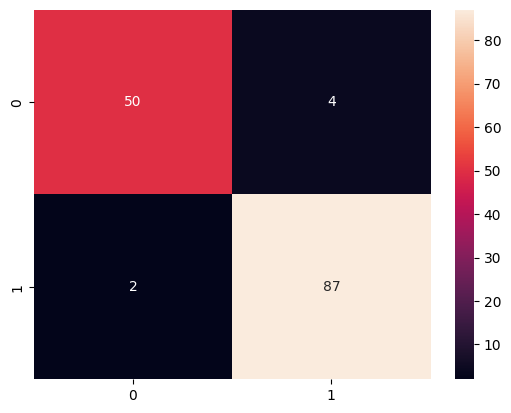

In [93]:
# Si visualizamos los errores de este árbol en una matriz de confusión:
cf_matrix = confusion_matrix(Y_test, arbol.predict(X_test))
sns.heatmap(cf_matrix, annot=True);

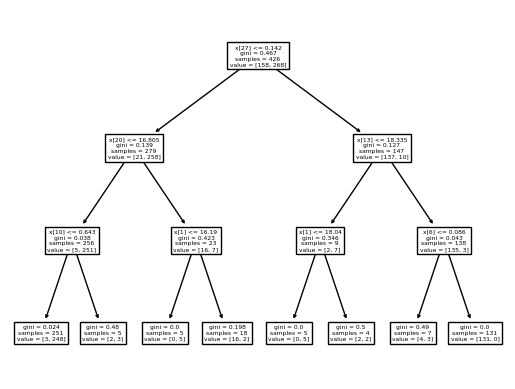

In [94]:
#Graficamos el árbol de decisión
plot_tree(arbol);

In [60]:
# Podemos mejorar la visualización de nuestro árbol a través de otras librerías
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

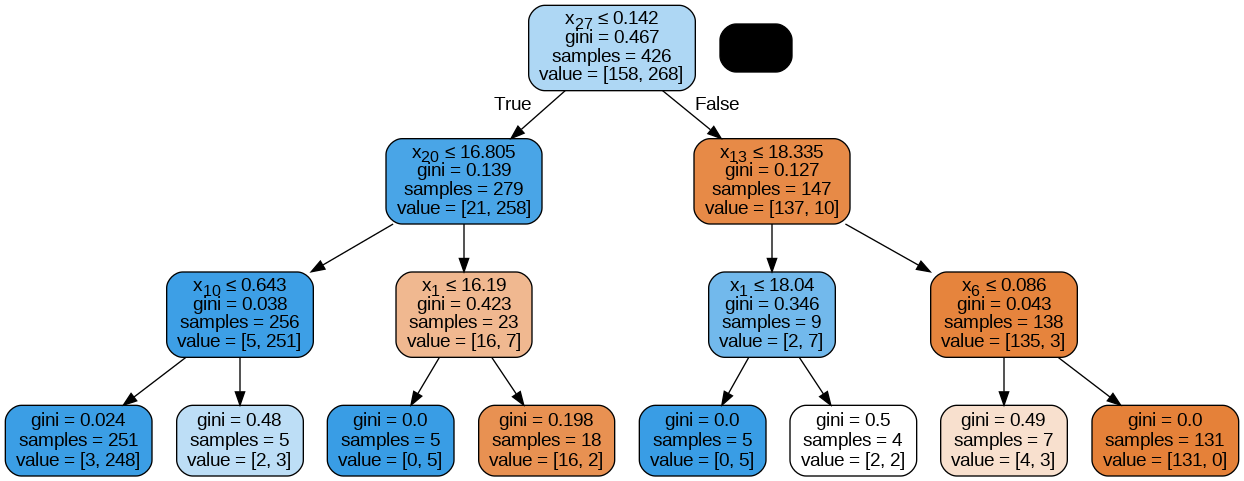

In [95]:
dot_data=StringIO()
export_graphviz(arbol, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)
grafico = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(grafico.create_png())

In [98]:
#Bonus track: overfitting y profundidad máxima
#Definimos una función
profundidad = list(range(1,20))
resultados_train = []
resultados_test  = []

for depth in profundidad:
    # instanciamos el modelo uniforme
    arbol = DecisionTreeClassifier(criterion='gini', max_depth=depth, min_samples_leaf=1, min_samples_split=2, ccp_alpha=0, class_weight="balanced")
    arbol.fit(X_train, Y_train)
    y_train_pred = arbol.predict(X_train)
    y_pred = arbol.predict(X_test)
    resultados_train.append(accuracy_score(Y_train, y_train_pred))
    resultados_test.append(accuracy_score(Y_test, y_pred))

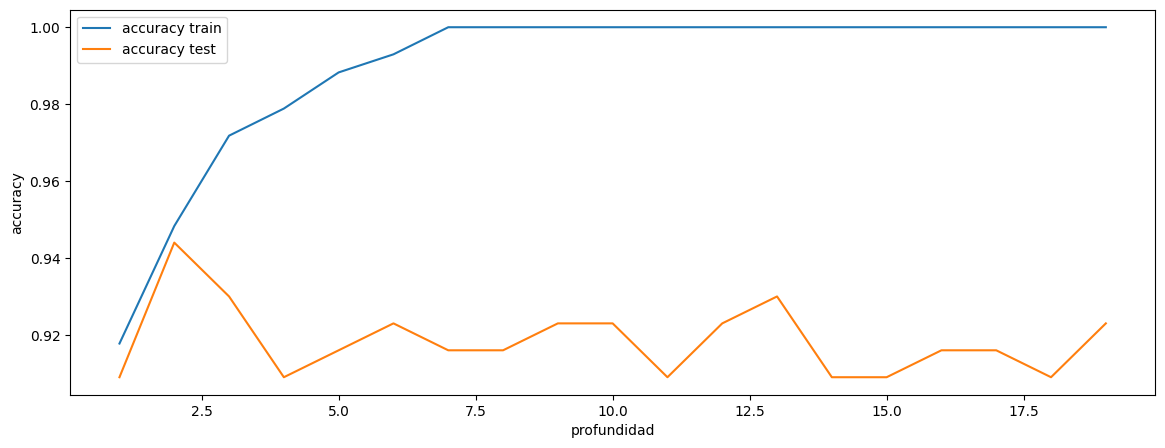

In [100]:
# Veremos qué ocurre con el accuracy en entrenamiento y testeo para cada caso
f, ax = plt.subplots(1,1,figsize=(14,5),sharey=True)
ax.plot(profundidad, resultados_train, profundidad, resultados_test);
ax.legend(['accuracy train', 'accuracy test']);
ax.set(xlabel='profundidad',ylabel='accuracy');

In [111]:
# Qué pasa si no definimos un stopper al split?
arbol = DecisionTreeClassifier(criterion='gini')
arbol.fit(X_train, Y_train)
print('Accuracy en entrenamiento: %f' % accuracy_score(Y_train,arbol.predict(X_train)))
print('Accuracy en test: %f' % accuracy_score(Y_test,arbol.predict(X_test)))

Accuracy en entrenamiento: 1.000000
Accuracy en test: 0.951049


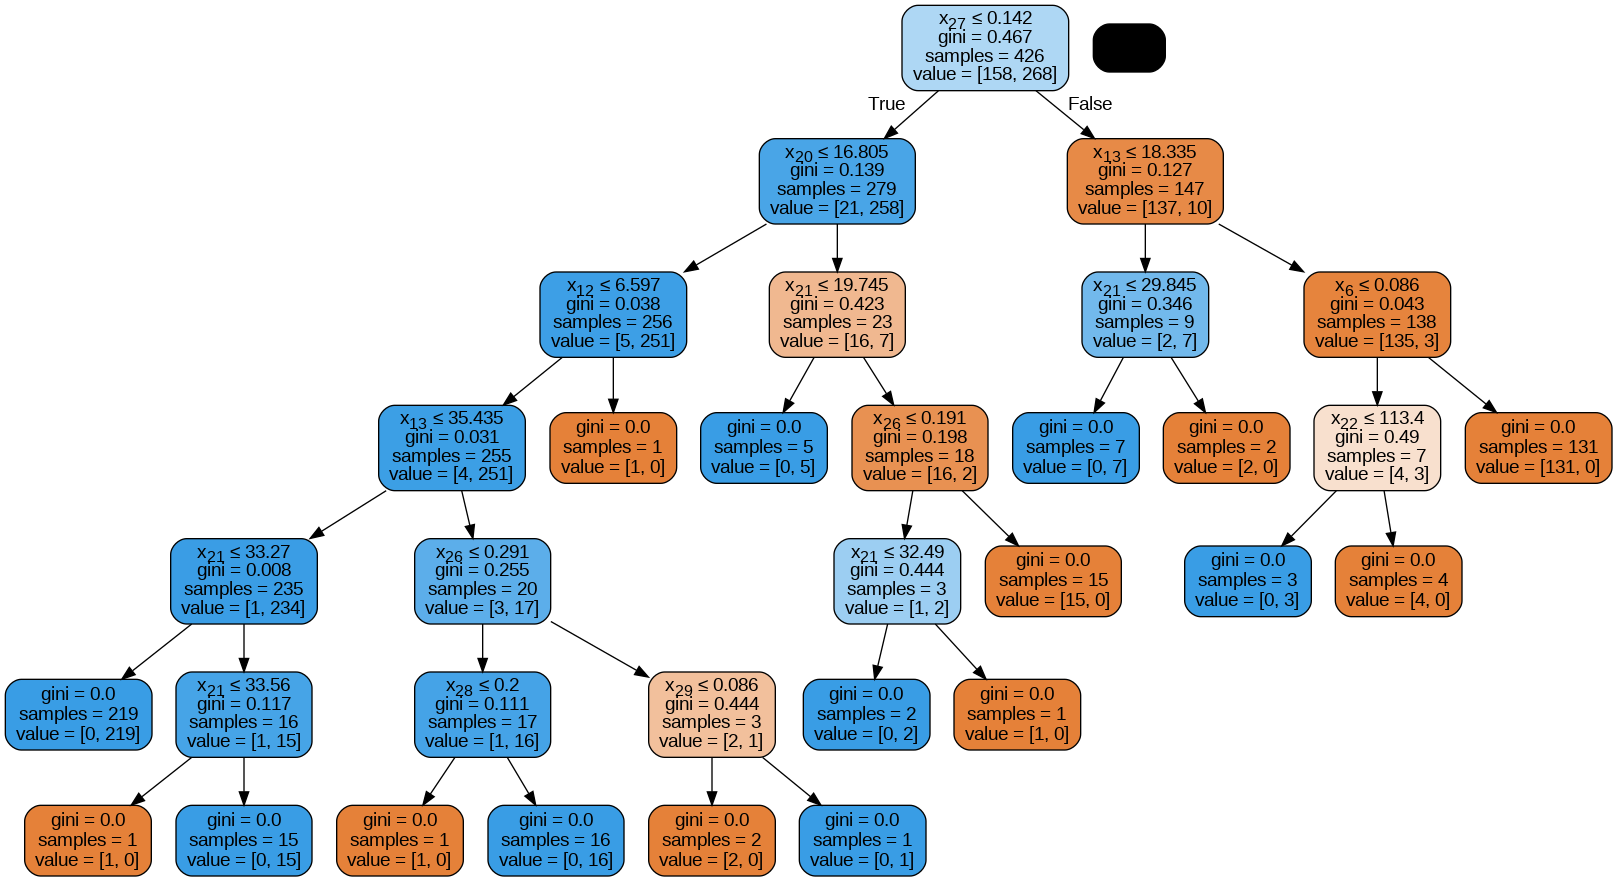

In [112]:
# Graficamos este nuevo arbol
dot_data = StringIO()
export_graphviz(arbol, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [113]:
#Definimos ccp_alpha como regularizador del modelo para que no caiga en overfitting:
#ccp_alpha entre 0 y 1 (entre más cercano a uno más castiga)
arbol = DecisionTreeClassifier(criterion='gini', ccp_alpha=0.01)
arbol.fit(X_train, Y_train)
print('Accuracy en entrenamiento: %f' % accuracy_score(Y_train,arbol.predict(X_train)))
print('Accuracy en test: %f' % accuracy_score(Y_test,arbol.predict(X_test)))

Accuracy en entrenamiento: 0.971831
Accuracy en test: 0.951049


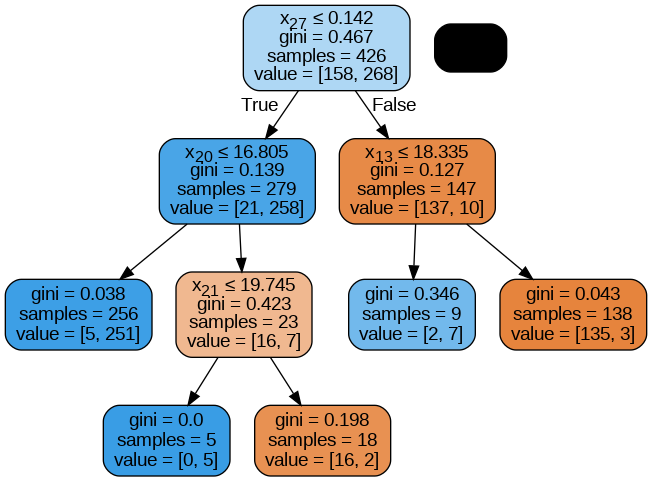

In [114]:
#Volvemos a graficar:
dot_data = StringIO()
export_graphviz(arbol, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())